In [81]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
pyber_df = city_data.merge(ride_data, how='left', on='city')
# Display the data table for preview

In [82]:
pyber_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

No handles with labels found to put in legend.


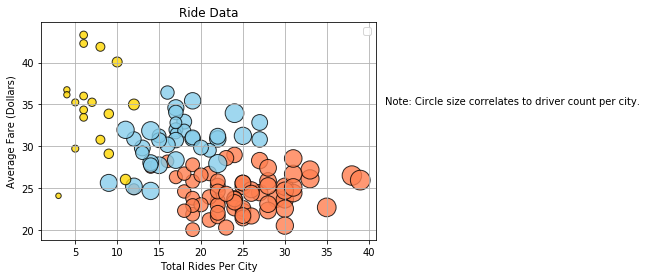

In [83]:
# Obtain the x and y coordinates for each of the three city types

# Data Sorted by Type, City, Number of Rides, Fare, Fare per City

urban_type = pyber_df.loc[pyber_df['type'] == 'Urban']
suburban_type = pyber_df.loc[pyber_df['type'] == 'Suburban']
rural_type = pyber_df.loc[pyber_df['type'] == 'Rural']

urban_city = urban_type.groupby(['city'])
suburban_city = suburban_type.groupby(['city'])
rural_city = rural_type.groupby(['city'])

urban_rides_city = urban_city.ride_id.count()
suburban_rides_city  = suburban_city.ride_id.count()
rural_rides_city = rural_city.ride_id.count()

urban_total_fares = urban_city.fare.sum()
suburban_total_fares = suburban_city.fare.sum()
rural_total_fares = rural_city.fare.sum()

urban_avg_fair_city = urban_total_fares / urban_rides_city
suburban_avg_fair_city = suburban_total_fares / suburban_rides_city
rural_avg_fair_city = rural_total_fares / rural_rides_city


# Build the scatter plots for each city types
plt.scatter(urban_rides_city,urban_avg_fair_city,
            s=10*urban_rides_city,
            c = "coral",
            edgecolors = "black",
            marker = "o",
            linewidth  = 1,
            alpha = 0.8)

plt.scatter(suburban_rides_city,suburban_avg_fair_city,
            s=10*urban_rides_city,
            c = "skyblue",
            edgecolors = "black",
            marker = "o",
            linewidth  = 1,
            alpha = 0.8)

plt.scatter(rural_rides_city,rural_avg_fair_city,
            s=10*rural_rides_city,
            c = "gold",
            edgecolors = "black",
            marker = "o",
            linewidth  = 1,
            alpha = 0.8)
plt.grid(axis='both')

# Incorporate the other graph properties

plt.title('Ride Data')
plt.xlabel('Total Rides Per City')
plt.ylabel("Average Fare (Dollars)")

# Create a legend

plt.legend(loc="upper right", scatterpoints=1, fontsize=10)

# Incorporate a text label regarding circle size

plt.text(x=42, y=35, s='Note: Circle size correlates to driver count per city.')

# Save Figure
plt.savefig("pyber_scatter.png", bbox_inches='tight')

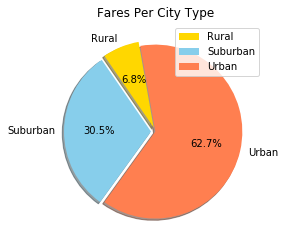

In [84]:
[]

pyber_fares = 100*pyber_df.groupby(['type']).sum()['fare'] / pyber_df['fare'].sum()
plt.pie(pyber_fares,
        labels=["Rural", "Suburban", "Urban"],
        colors=['gold', 'skyblue', 'coral'],
        autopct='%1.1f%%',
        startangle= 100,
        explode = (0.05,0.05,0),
        shadow=True)
plt.title('Fares Per City Type')
plt.savefig("pyber_pie_fares_per_type.png", bbox_inches='tight')
plt.legend(loc = "upper right")

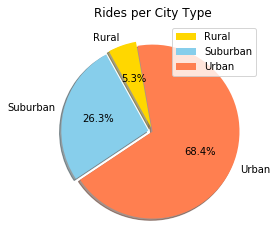

In [85]:
pyber_rides = 100*pyber_df.groupby(['type']).count()['driver_count'] / pyber_df["driver_count"].count()

plt.pie(pyber_rides,
        labels=["Rural", "Suburban", "Urban"],
        colors=['gold', 'skyblue', 'coral'],
        autopct='%1.1f%%',
        startangle= 100,
        explode = (0.05,0.05,0),
        shadow=True)
plt.title('Rides per City Type')
plt.savefig("pyber_pie_rides_per_type.png", bbox_inches='tight')
plt.legend(loc = "upper right")

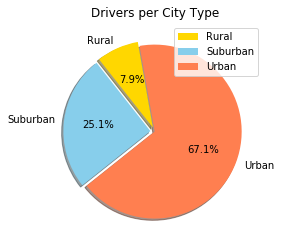

In [86]:
pyber_drivers = pyber_df.groupby(['type'])['driver_count'].mean()

plt.pie(pyber_drivers,
        labels=["Rural", "Suburban", "Urban"],
        colors=['gold', 'skyblue', 'coral'],
        autopct='%1.1f%%',
        startangle= 100,
        explode = (0.05,0.05,0),
        shadow=True)
plt.title('Drivers per City Type')
plt.savefig("pyber_pie_drivers_per_type.png", bbox_inches='tight')
plt.legend(loc = "upper right")